In [246]:
from capo.load_datasets import get_tasks
from glob import glob
import pandas as pd

In [247]:
dataset = "gsm8k"
optimizer = "EvoPromptGA"  # "EvoPromptGA" # CAPO
model = "llama"
seed = 44

In [248]:
task, _, _ = get_tasks(
    dataset_name=dataset,
    optimizer_name=optimizer,
    seed=seed,
    block_size=30,
)

init_prompts = task.initial_prompts

C:\Users\tzehl\Documents\programming\capo\capo\load_datasets.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "input"] = df[config.input]
C:\Users\tzehl\Documents\programming\capo\capo\load_datasets.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "target"] = config.target(df)
C:\Users\tzehl\Documents\programming\capo\capo\load_datasets.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [249]:
path = glob(f"../results/{dataset}/{model}/{optimizer}/seed{seed}/*/*/step_results_eval.csv")[0]
df = pd.read_csv(path)

In [250]:
df["contains_init"] = df["prompt"].apply(lambda x: any([prompt in x for prompt in init_prompts]))

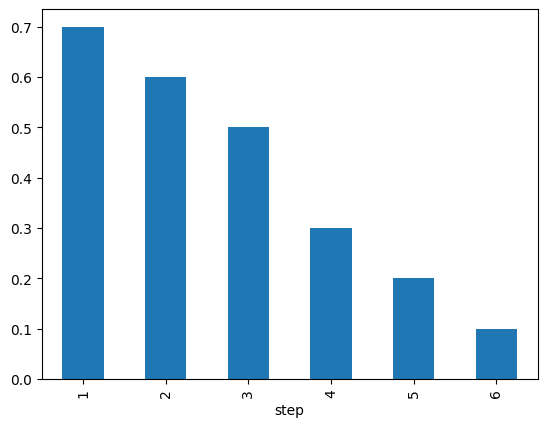

In [251]:
df.groupby("step").mean(numeric_only=True)["contains_init"].plot(kind="bar");

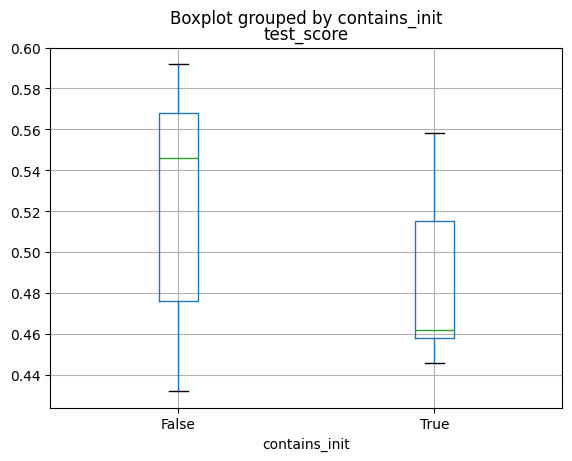

In [252]:
# boxplot
df.groupby("prompt").first().boxplot(column="test_score", by="contains_init");

In [253]:
# get the init prompt that dominates
df[df["contains_init"]].groupby("prompt", as_index=False).mean(numeric_only=True)[
    ["prompt", "test_score"]
].sort_values("test_score", ascending=False)

,prompt,test_score
2,I'm struggling with this math word problem tha...,0.558
0,Analyze and solve the following elementary sch...,0.526
4,Solve this math problem by breaking it down in...,0.504
3,Please analyze this elementary school math pro...,0.462
5,This problem requires multi-step reasoning to ...,0.458
6,Work through this grade school word problem me...,0.458
1,I'm having trouble with this grade school math...,0.446
